In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

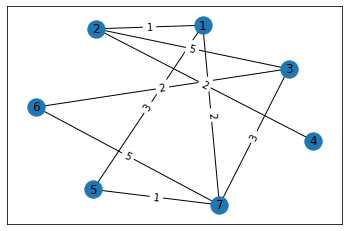

In [2]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([
    (1, 2, {'weight': 1}), (1, 5, {'weight': 3}), (1, 7, {'weight': 2}),
    (2, 4, {'weight': 2}), (2, 3, {'weight': 5}),
    (3, 7, {'weight': 3}), (3, 6, {'weight': 2}),
    (5, 7, {'weight': 1}),
    (6, 7, {'weight': 5}),
])

pos=nx.spring_layout(G, seed=5, k=10)
nx.draw_networkx(G,pos)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.show()

## Distance statistics
**<a href="#distance">(Geodesic) Distance</a>** between $u$ and $v$, denoted as $d(u, v)$ is the length of a shortest ($u$, $v$)-path.

**<a href="#eccentricity">Eccentricity</a>**: how far the farthest vertex from $u$ is positioned in the network. $\epsilon$($u$) = $max\{d(u, v) | v \in V(G)\}$

**<a href="#radius">Radius</a>**: how disseperate the vertices are. $rad(G) = min\{\epsilon (u)|u \in V(G)\}$

**<a href="#diameter">Diameter</a>**: tells what the maximal distance is, thus the maximal shortest path. $diam(G) = max\{d(u, v)|u, v \in V(G)\}$ 


**<a href="#avg_len_path">Average length of shortest path</a>**: $\bar{d}(u) = \frac{1}{|V|-1} \Sigma_{v\in V, v\neq u} d(u, v)$

**<a href="#avg_path">Average path length</a>**: $\bar{d}(G) = \frac{1}{|V|} \Sigma_{u \in V} \bar{d}(u)$

**<a href="#char_path">Characteristic path length</a>** of G is defined as the median over all $\bar{d}(u)$

--------------
<span id='distance'></span>
#### (Geodesic) distance

In [5]:
shortest_paths = dict(nx.all_pairs_dijkstra(G))

data = {}
for k in shortest_paths.keys():
    data[k] = {k: v for k, v in sorted(list(shortest_paths[k][0].items()))}
    
df = pd.DataFrame(data=data)
df

,1,2,3,4,5,6,7
1,0,1,5,3,3,7,2
2,1,0,5,2,4,7,3
3,5,5,0,7,4,2,3
4,3,2,7,0,6,9,5
5,3,4,4,6,0,6,1
6,7,7,2,9,6,0,5
7,2,3,3,5,1,5,0


<span id="eccentricity"></span>
#### Eccentricity

In [6]:
df['eccentricity'] = df.max(axis=0)
df

,1,2,3,4,5,6,7,eccentricity
1,0,1,5,3,3,7,2,7
2,1,0,5,2,4,7,3,7
3,5,5,0,7,4,2,3,7
4,3,2,7,0,6,9,5,9
5,3,4,4,6,0,6,1,6
6,7,7,2,9,6,0,5,9
7,2,3,3,5,1,5,0,5


In [16]:
# Double check with built-in function
print(nx.eccentricity(G, sp={k: v[0] for (k, v) in shortest_paths.items()}))

# or
print(nx.eccentricity(G, sp=df.to_dict()))

{1: 7, 2: 7, 3: 7, 4: 9, 5: 6, 6: 9, 7: 5}
{1: 7, 2: 7, 3: 7, 4: 9, 5: 6, 6: 9, 7: 5}


<span id="radius"></span>

#### Radius

In [24]:
radius = df['eccentricity'].min()
print('Radius of graph G, rad(G) = {}'.format(radius))

Radius of graph G, rad(G) = 5


In [26]:
# Double check
nx.radius(G, df['eccentricity'].to_dict())

5

<span id="diameter"></span>
#### Diameter

In [27]:
diam = df['eccentricity'].max()
print('The diameter of graph G, diam(G) = {}'.format(diam))

The diameter of graph G, diam(G) = 9


In [28]:
# double check
nx.diameter(G, df['eccentricity'].to_dict())

9

<span id="avg_len_path"></span>
#### Average length of shortest path

In [33]:
# Sum axis=0 only works if you know there are NO loops. Otherwise manually loop through it 
# and skip vertices where vertex i is vertex i
df['average_path'] = df[[1, 2, 3, 4, 5, 6, 7]].sum(axis=0) / (7 - 1)
df

,1,2,3,4,5,6,7,eccentricity,average_path
1,0,1,5,3,3,7,2,7,3.500000
2,1,0,5,2,4,7,3,7,3.666667
3,5,5,0,7,4,2,3,7,4.333333
4,3,2,7,0,6,9,5,9,5.333333
5,3,4,4,6,0,6,1,6,4.000000
6,7,7,2,9,6,0,5,9,6.000000
7,2,3,3,5,1,5,0,5,3.166667


<span id="avg_path"></span>

#### Average path length

In [37]:
average_path_length = df['average_path'].sum() / 7
print("Average path length, globally: {}".format(average_path_length))

Average path length, globally: 4.285714285714286


In [39]:
# double check
nx.average_shortest_path_length(G, weight="weight")

4.285714285714286

<span id="char_path"></span>

#### Characteristic path length

In [42]:
np.median(df['average_path'].tolist())

4.0